In [11]:
import pandas as pd
df = pd.read_csv("ce1dc0436aba5b7a5c9666f47fa5a380-5ce3854392b43ff97907112d344fc008229b0445/titanic.csv",sep=",")
df

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,Pears,Mrs. Thomas (Edith Wearne),female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,Meo,Mr. Alfonzo,male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,van Billiard,Mr. Austin Blyler,male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,Olsen,Mr. Ole Martin,male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Lname            0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [13]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 ])

In [14]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2'], dtype=object)

In [16]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

In [17]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Lname          0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

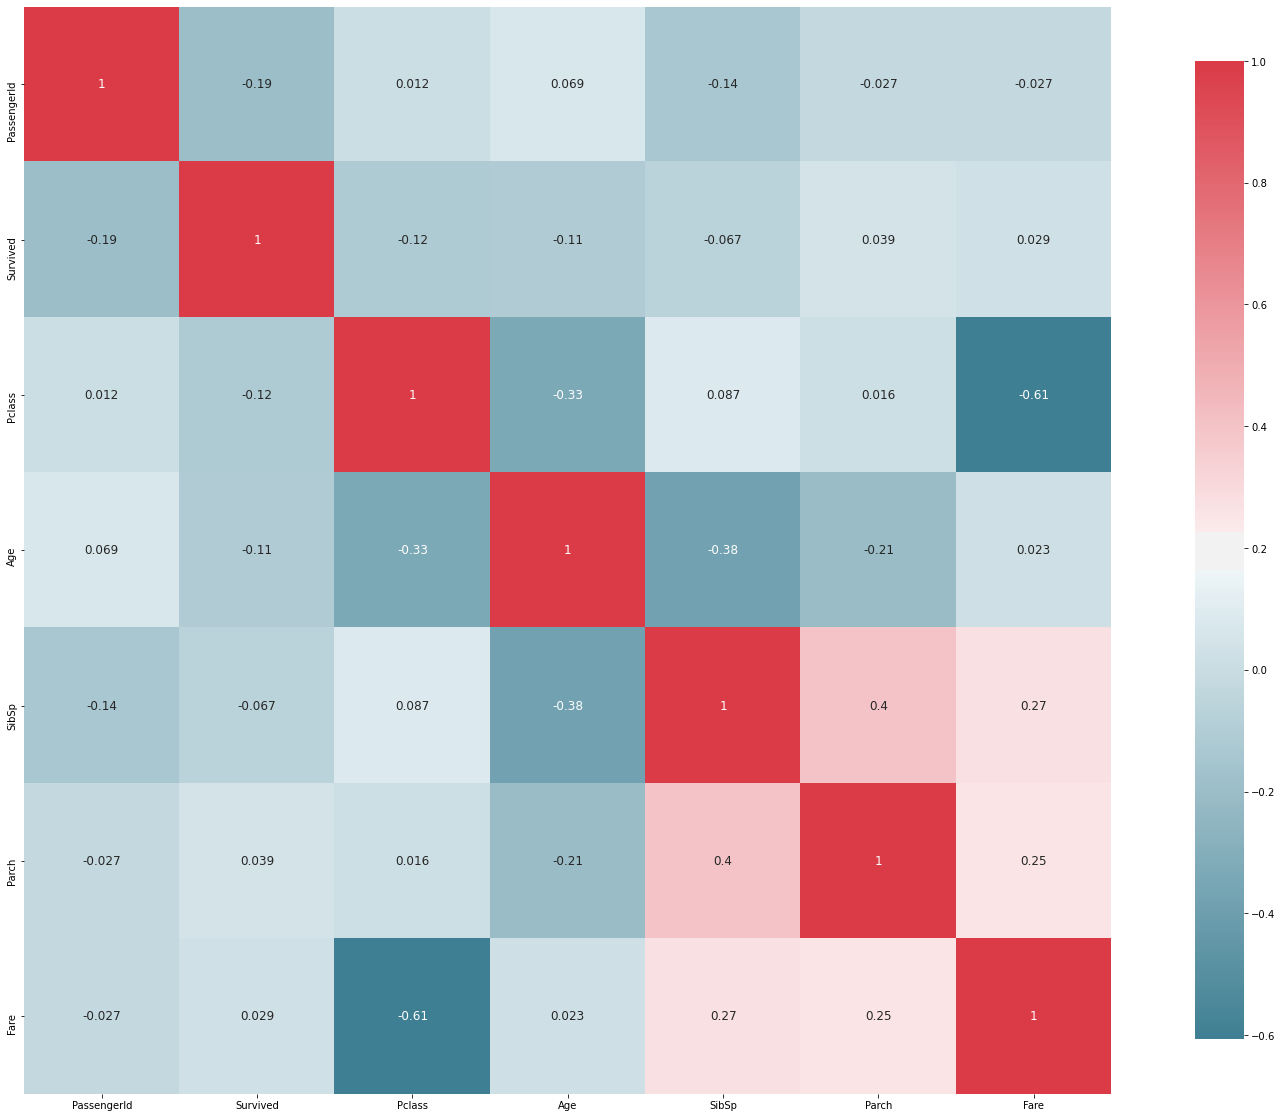

In [25]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 30 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 })

plot_correlation_map(df)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = df[['Pclass', 'Age','Parch', 'PassengerId']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.64


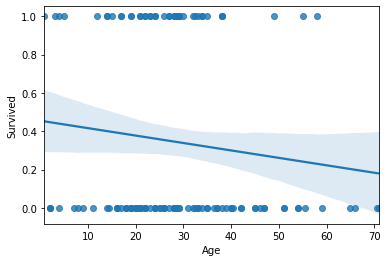

In [21]:
import seaborn as sns

sns.regplot(x='Age',y='Survived', data=df)

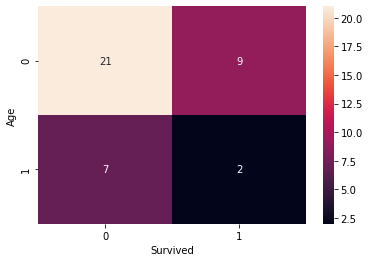

In [22]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Age'], colnames=['Survived'])
sns.heatmap(confusion_matrix, annot=True)

The ROC curve summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the False Positive Rate (FPR) on the X-axis and the True Positive Rate (TPR) on the Y-axis.


In [44]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc


0.5333333333333333